# Suitability Project
Brian Li \
11/12/23

This document will perform suitability analysis to find where a hypothetical e-commerce company should locate their distribution centers, prioritizing distance from airports, education rates, and broadband connection.

Airport locations were sourced from OpenStreetMap via OpenDataSoft, and ACS data were sourced from the UCSB via Michael Minn.

In [1]:
import os
os.environ['USE_PYGEOS'] = '0'
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
counties = gpd.read_file("https://michaelminn.net/tutorials/data/2015-2019-acs-counties.geojson")
counties = counties[~counties["ST"].isin(['AK', 'HI', 'PR'])]
counties = counties[["Name", "ST", "FactFinder GEOID", "Percent Bachelors Degree", "Percent Broadband", "Median Household Income", "Median Monthly Mortgage", "geometry"]]
counties = counties.to_crs("ESRI:102008")
states = gpd.read_file("https://michaelminn.net/tutorials/data/2015-2019-acs-states.geojson")
states = states[~states["ST"].isin(['AK', 'HI', 'PR'])]
states = states.to_crs(counties.crs)

In [3]:
airports = gpd.read_file('https://raw.githubusercontent.com/ugin331/GGIS-371/main/osm-world-airports.geojson')
airports = airports.to_crs("ESRI:102008")
airports = airports[~airports['iata'].isin(['SPN', 'ANC', 'MDW', 'KOA', 'PPG', 'HIK', 'LIH', 'FAI', 'TIQ', 'ONT'])]

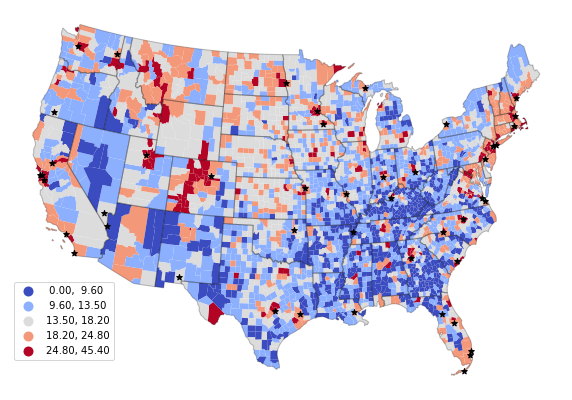

In [4]:
axis = counties.plot("Percent Bachelors Degree", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

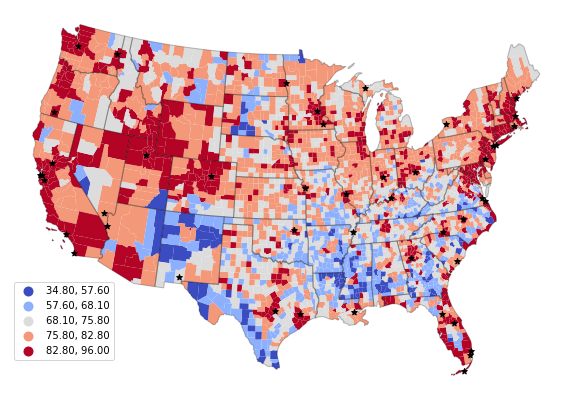

In [5]:
axis = counties.plot("Percent Broadband", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

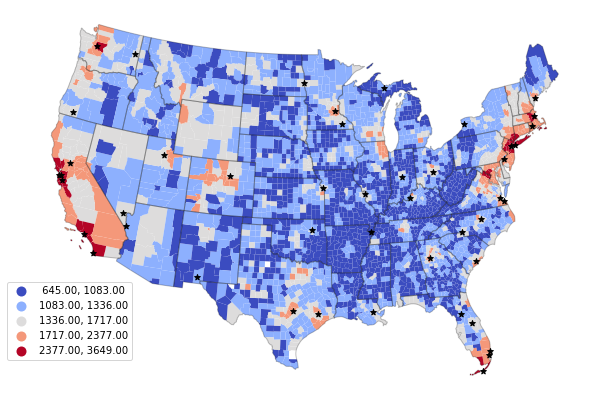

In [6]:
axis = counties.plot("Median Monthly Mortgage", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

In [4]:
counties["Affordability"] = 100 * (counties["Median Household Income"] * 0.29) / (counties["Median Monthly Mortgage"] * 12)
counties = counties.dropna()
counties = counties.sort_values("Affordability", ascending=False).reset_index(drop=True)
counties[["Name", "ST", "Affordability"]].head()

,Name,ST,Affordability
0,Steele,ND,202.267850
1,Greenlee,AZ,185.033876
2,Borden,TX,167.422585
3,Daggett,UT,163.459865
4,Burke,ND,161.456747


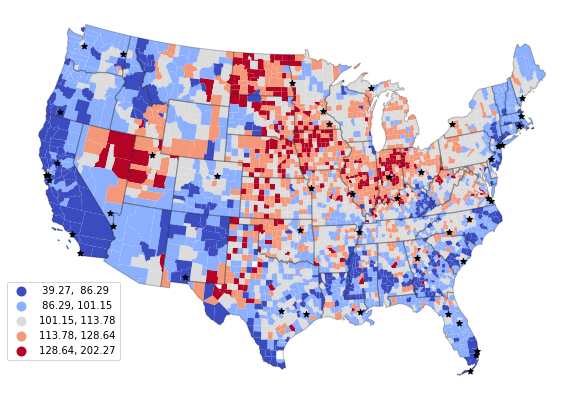

In [8]:
axis = counties.plot("Affordability", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

In [9]:
counties.head()

,Name,ST,FactFinder GEOID,Percent Bachelors Degree,Percent Broadband,Median Household Income,Median Monthly Mortgage,geometry,Affordability
0,Steele,ND,0500000US38091,27.5,80.6,70724.0,845.0,"POLYGON ((-140514.785 907664.874, -133294.535 ...",202.267850
1,Greenlee,AZ,0500000US04011,10.4,82.2,63473.0,829.0,"POLYGON ((-1186792.769 -660364.640, -1184816.1...",185.033876
2,Borden,TX,0500000US48033,27.0,79.7,72188.0,1042.0,"POLYGON ((-506714.855 -810249.556, -494817.087...",167.422585
3,Daggett,UT,0500000US49009,9.7,88.3,75417.0,1115.0,"POLYGON ((-1103961.087 199385.075, -1081610.28...",163.459865
4,Burke,ND,0500000US38013,19.0,74.4,77232.0,1156.0,"POLYGON ((-479550.223 1080048.526, -473443.895...",161.456747


In [5]:
airports = airports.to_crs(counties.crs)
air_counties = counties.sjoin_nearest(airports, how="left", distance_col="distance")
air_counties["distance"] = air_counties["distance"] / 1000
air_counties = air_counties.drop_duplicates("FactFinder GEOID")
air_counties = air_counties.drop("index_right", axis=1)
air_counties = air_counties.sort_values("distance").reset_index(drop=True)
air_counties[["Name", "ST", "distance"]].head()

,Name,ST,distance
0,Cass,ND,0.0
1,Orange,FL,0.0
2,Wake,NC,0.0
3,Broward,FL,0.0
4,Charleston,SC,0.0


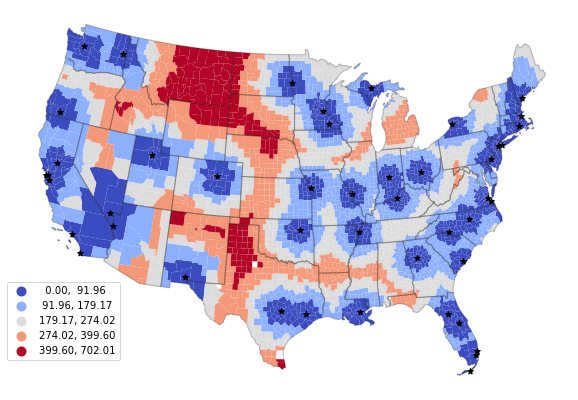

In [13]:
axis = air_counties.plot("distance", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

In [10]:
air_counties["Education Quotient"] = 100 * (air_counties["Percent Bachelors Degree"]) / (air_counties["Percent Bachelors Degree"].mean())
air_counties = air_counties.sort_values("Education Quotient", ascending=False).reset_index(drop=True)
air_counties[["Name", "ST", "Education Quotient"]].head()

,Name,ST,Education Quotient
0,Pitkin,CO,319.029249
1,San Miguel,CO,301.461559
2,Teton,WY,273.353255
3,Gunnison,CO,267.028887
4,Williamson,TN,265.623472


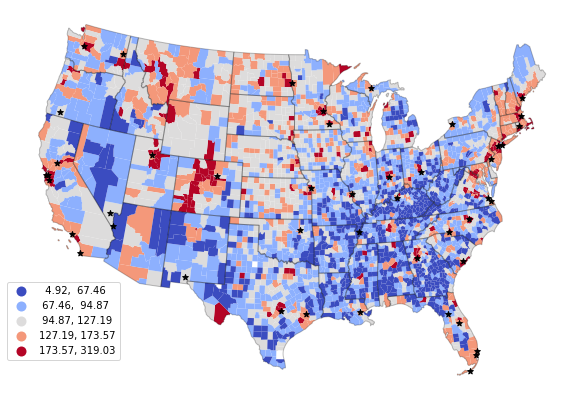

In [11]:
axis = air_counties.plot("Education Quotient", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

In [12]:
air_counties["Broadband Quotient"] = 100 * (air_counties["Percent Broadband"]) / (air_counties["Percent Broadband"].mean())
air_counties = air_counties.sort_values("Broadband Quotient", ascending=False).reset_index(drop=True)
air_counties[["Name", "ST", "Suitable Broadband"]].head()

,Name,ST,Suitable Broadband
0,Douglas,CO,127.345494
1,Fairfax,VA,126.549585
2,Morgan,UT,125.621024
3,Loudoun,VA,125.488373
4,Stafford,VA,125.090418


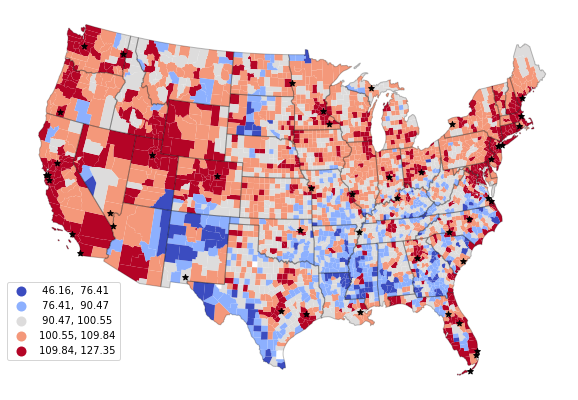

In [13]:
axis = air_counties.plot("Broadband Quotient", cmap="coolwarm",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

The criteria and thresholds were as follows: % Broadband and % Bachelors Degree greater than or equal to the national average, and Distance less than 100 km from an international airport.

One county considered suitable is Richmond County, VA.

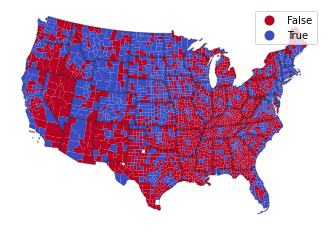

In [16]:
air_counties["Suitable Education"] = (air_counties["Education Quotient"] >= 100)
axis = air_counties.plot("Suitable Education", cmap="coolwarm_r", legend=True)
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
axis.set_axis_off()
plt.show()

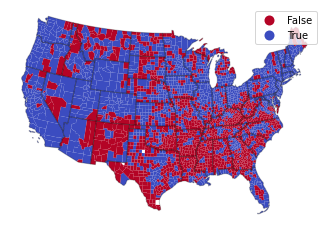

In [17]:
air_counties["Suitable Broadband"] = (air_counties["Broadband Quotient"] >= 100)
axis = air_counties.plot("Suitable Broadband", cmap="coolwarm_r", legend=True)
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
axis.set_axis_off()
plt.show()

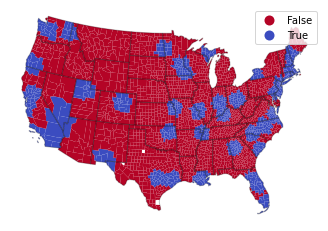

In [18]:
air_counties["Suitable Distance"] = (air_counties["distance"] <= 100)
axis = air_counties.plot("Suitable Distance", cmap="coolwarm_r", legend=True)
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
axis.set_axis_off()
plt.show()

In [ ]:
air_counties["Suitable Affordability"] = (air_counties["Affordability"] <= 100)
axis = air_counties.plot("Suitable Distance", cmap="coolwarm_r", legend=True)
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
axis.set_axis_off()
plt.show()

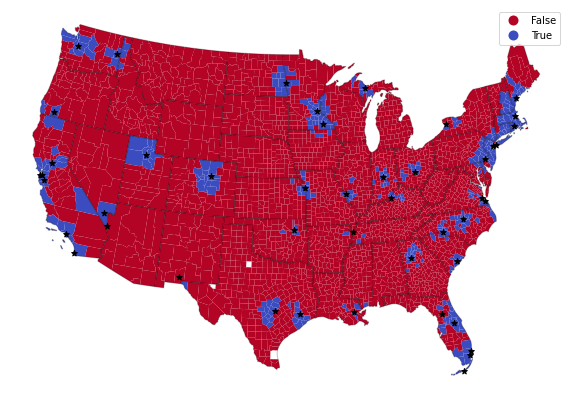

In [20]:
air_counties["Categorical Suitability"] = air_counties["Suitable Education"] & \
                air_counties["Suitable Distance"] & air_counties["Suitable Broadband"]
axis = air_counties.plot("Categorical Suitability", cmap="coolwarm_r",
        legend=True, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()

In [21]:
list_counties = air_counties[air_counties["Categorical Suitability"]]
list_counties[["Name", "ST"]]

,Name,ST
0,Douglas,CO
2,Morgan,UT
5,Hamilton,IN
9,Forsyth,GA
12,Delaware,OH
...,...,...
1641,Andrew,MO
1653,Fayette,TN
1665,Bonner,ID
1670,Putnam,GA


The criteria used were rates of higher education, broadband access, and distance from airports. Distance from airports was weighted the highest, at 0.5, because the closer the distribution center is to the airport the better. Higher education rates and broadband access were then weighted with the remaining 0.5, at 0.3 and 0.2 respectively.

One of the locations considered suitable is in the San Francisco Bay Area.

This analysis reinforces the relatively obvious- major urban areas tend to have high internet use and higher concentrations of people with degrees and are generally close to major airports, making them good locations to place distribution centers near.

In [22]:
air_counties["education_index"] = (air_counties["Percent Bachelors Degree"] - min(air_counties["Percent Bachelors Degree"])) / \
    (max(air_counties["Percent Bachelors Degree"]) - min(air_counties["Percent Bachelors Degree"]))
air_counties["broadband_index"] = (air_counties["Percent Broadband"] - min(air_counties["Percent Broadband"])) / \
    (max(air_counties["Percent Broadband"]) - min(air_counties["Percent Broadband"]))
air_counties["airport_index"] = (max(air_counties["distance"]) - air_counties["distance"]) / \
    (max(air_counties["distance"]) - min(air_counties["distance"]))

air_counties[["education_index", "broadband_index", "airport_index"]].head()

,education_index,broadband_index,airport_index
0,0.816555,1.000000,0.950463
1,0.684564,0.990196,0.710925
2,0.545861,0.978758,0.970462
3,0.778523,0.977124,0.722731
4,0.510067,0.972222,0.788688


In [24]:
air_counties["Weighted Suitability"] = (0.3 * air_counties["education_index"]) + \
    (0.2 * air_counties["broadband_index"]) + \
    (0.5 * air_counties["airport_index"])
air_counties = air_counties.sort_values("Weighted Suitability", ascending=False).reset_index(drop=True)
air_counties[["Name", "ST", "Weighted Suitability"]].head()

,Name,ST,Weighted Suitability
0,Hamilton,IN,0.921820
1,Douglas,CO,0.920198
2,Wake,NC,0.901075
3,Broomfield,CO,0.896531
4,Johnson,KS,0.895232


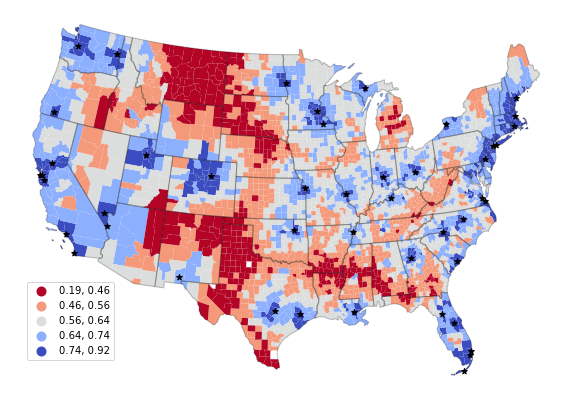

In [25]:
axis = air_counties.plot("Weighted Suitability", cmap="coolwarm_r",
    legend=True, scheme="naturalbreaks",
    legend_kwds={"bbox_to_anchor":(0.2, 0.3)}, figsize=(10, 10))
states.plot(edgecolor="#00000040", facecolor="none", ax=axis)
airports.plot(marker="*", color="black", ax=axis)
axis.set_axis_off()
plt.show()